In [1]:
import pandas as pd
import numpy as np
import collections
import datetime
from datetime import timedelta

In [2]:
mainDir = "/home/garg/tweets/"
comboHistoryFile = mainDir + "comboHistory.csv"
allTweetsFile = mainDir + "tweetHistory.csv"

outputFile = mainDir + "timePredictions.csv"

In [3]:
comboHistory = pd.read_csv(comboHistoryFile,
                             sep=";", 
                             header = 0)
allTweets = pd.read_csv(allTweetsFile,
                        sep=";", 
                        header = 0)

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 9.0)
%matplotlib inline

In [5]:
len(allTweets)

613

In [6]:
len(comboHistory)

476

In [7]:
comboHistory['timestamp'] = pd.to_datetime(comboHistory['timestamp']) + timedelta(hours=1)

In [8]:
comboHistory.columns

Index(['timestamp', 'isTrumpTweet', 'isNewsTweet', 'isFakeNewsTweet',
       'isDemocratsTweet', 'isPoliticsTweet', 'count', 'meanTextLength',
       'totalHashtagCount', 'totalTrumpCount', 'totalSensitiveCount'],
      dtype='object')

In [9]:
meanMetrics = comboHistory.groupby(['isTrumpTweet','isNewsTweet','isFakeNewsTweet','isDemocratsTweet','isPoliticsTweet'])['count', 'meanTextLength',
       'totalHashtagCount', 'totalTrumpCount', 'totalSensitiveCount'].agg(np.mean).reset_index()
meanMetrics

,isTrumpTweet,isNewsTweet,isFakeNewsTweet,isDemocratsTweet,isPoliticsTweet,count,meanTextLength,totalHashtagCount,totalTrumpCount,totalSensitiveCount
0,False,False,False,False,False,227.894231,84.984734,30.615385,239.923077,1.548077
1,False,False,False,False,True,1.656250,102.414931,2.729167,0.000000,0.000000
2,False,False,True,False,False,4.336957,121.273628,18.380435,0.630435,0.000000
3,False,True,False,False,False,19.340426,102.308962,44.159574,0.797872,0.000000
4,True,False,False,False,False,3.444444,92.184259,6.111111,4.777778,0.000000


In [10]:
len(meanMetrics)

5

In [11]:
def plotMetric(df,metricName):
    traces = list()
    
    fig = plt.figure(figsize=(16,9))
    ax = plt.axes()

    for i in range(0,len(df)):
        df.plot(y=metricName, kind = 'bar', label=i, ax=ax)
    #plt.legend()
    ax.legend().set_visible(False)

    plt.ylabel(metricName)
    
    plt.title('Mean of Metric: ' + metricName, fontsize=18)

In [12]:
def plotMetricTimeseries(dfList,metricName,skip=0):
    traces = list()
    
    fig = plt.figure(figsize=(16,9))
    ax = plt.axes()

    for i in range(skip,len(dfList)):
        df = dfList[i]
        df.plot(x='timestamp', y=metricName, label=i, ax=ax)
        
    titleStr= 'Timeseries of Metric: ' + metricName
    
    
    plt.xlabel('time')
    plt.ylabel(metricName)
    plt.suptitle('Timeseries of Metric: ' + metricName, fontsize=18)
    
    if(skip>0):
       plt.title('(skipped ' + str(skip) + ' datarows)', fontsize=10)
    
    plt.legend()

In [13]:
meanMetrics.loc[:,['isTrumpTweet','isNewsTweet','isFakeNewsTweet','isDemocratsTweet','isPoliticsTweet']]

,isTrumpTweet,isNewsTweet,isFakeNewsTweet,isDemocratsTweet,isPoliticsTweet
0,False,False,False,False,False
1,False,False,False,False,True
2,False,False,True,False,False
3,False,True,False,False,False
4,True,False,False,False,False


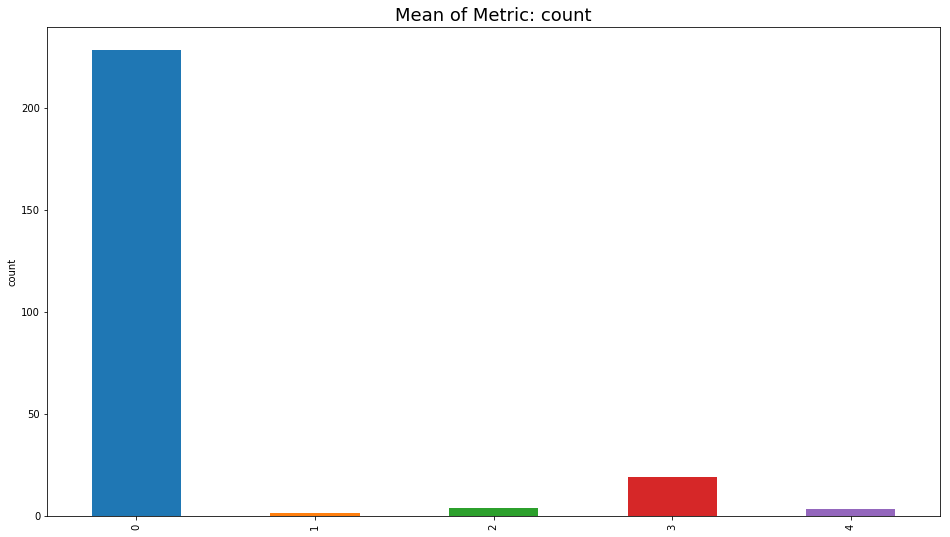

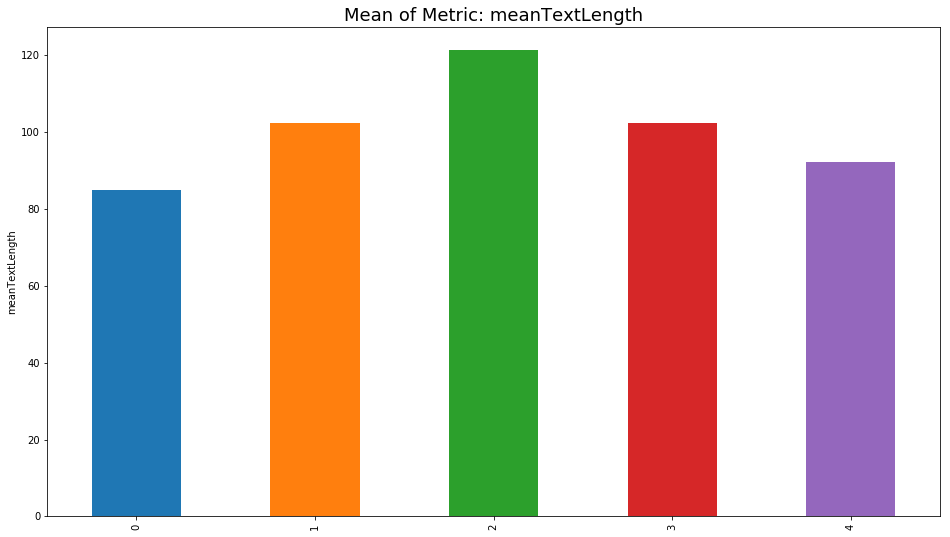

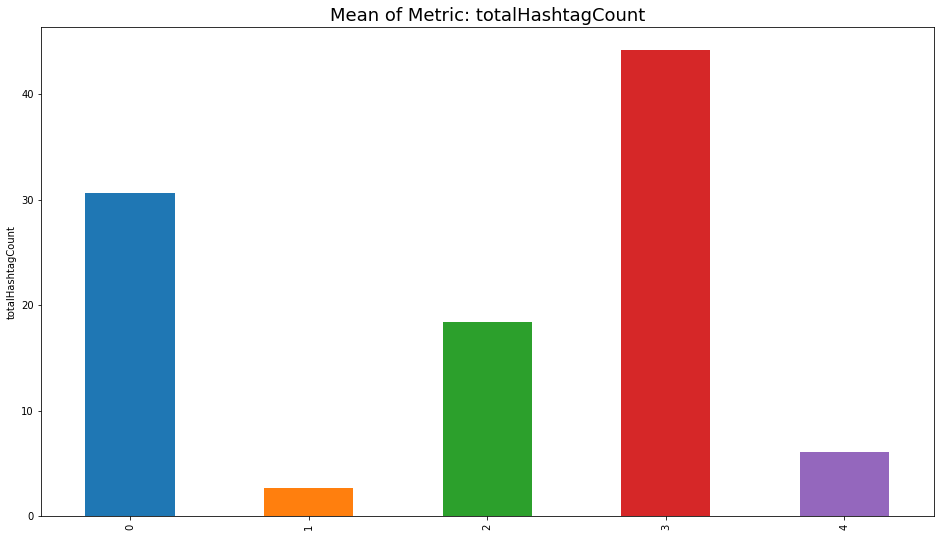

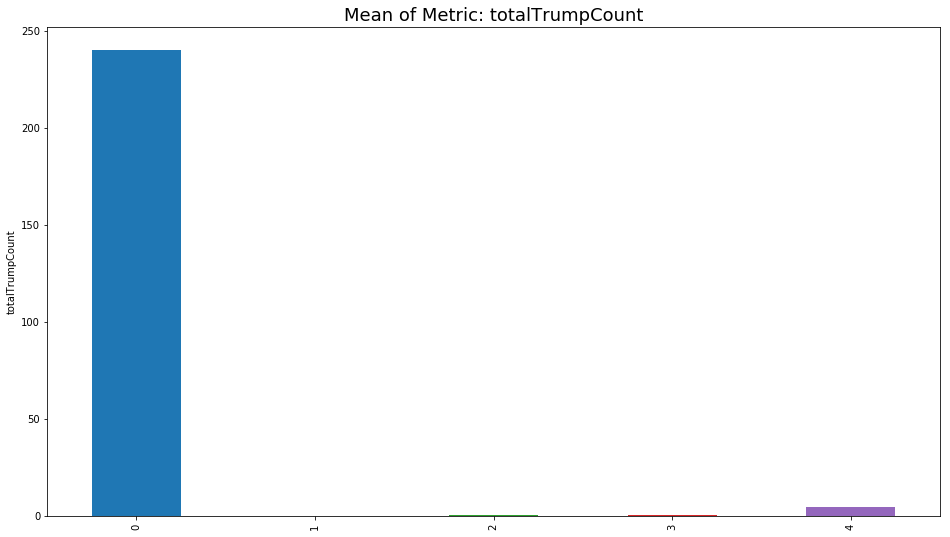

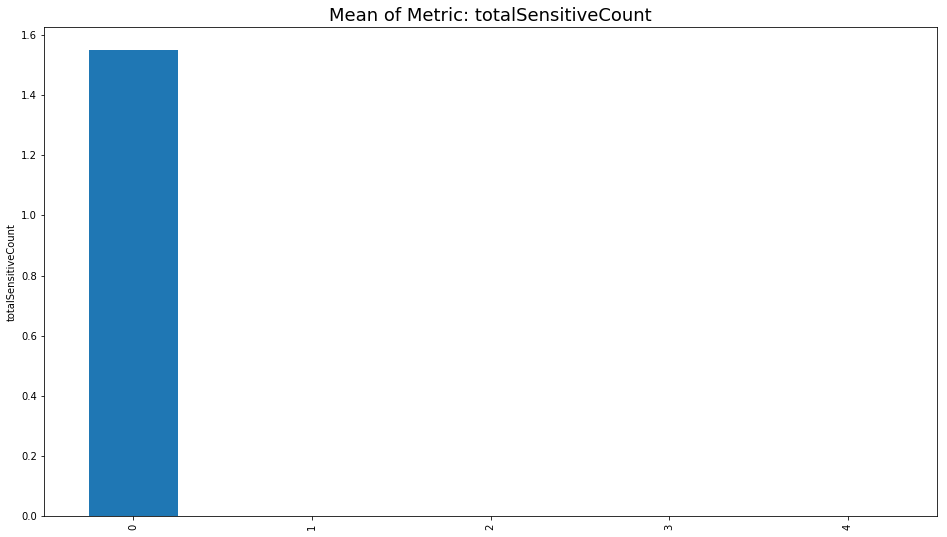

In [14]:
plotMetric(meanMetrics, 'count')
plotMetric(meanMetrics, 'meanTextLength')
plotMetric(meanMetrics, 'totalHashtagCount')
plotMetric(meanMetrics, 'totalTrumpCount')
plotMetric(meanMetrics, 'totalSensitiveCount')

In [15]:
comboList = list()
for i in range(0, len(meanMetrics)):
    comboList.append(meanMetrics.loc[i,['isTrumpTweet','isNewsTweet','isFakeNewsTweet','isDemocratsTweet','isPoliticsTweet']].to_frame().transpose())

In [16]:
comboTimeseriesList = list()
for i in range(0,len(comboList)):
    comboTimeseriesList.append(comboList[i]
                               .merge(comboHistory,on=['isTrumpTweet',
                                                       'isNewsTweet',
                                                       'isFakeNewsTweet',
                                                       'isDemocratsTweet',
                                                       'isPoliticsTweet']))

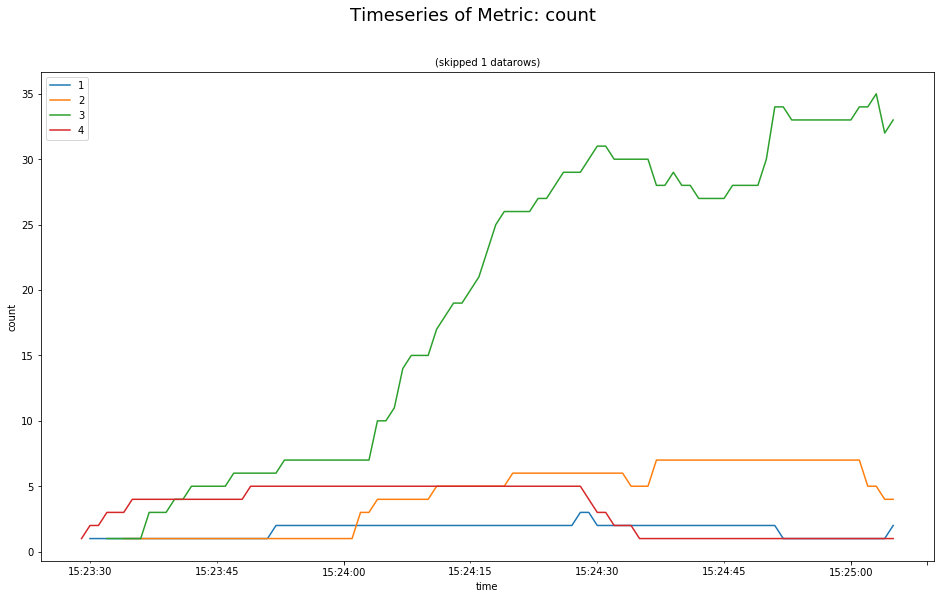

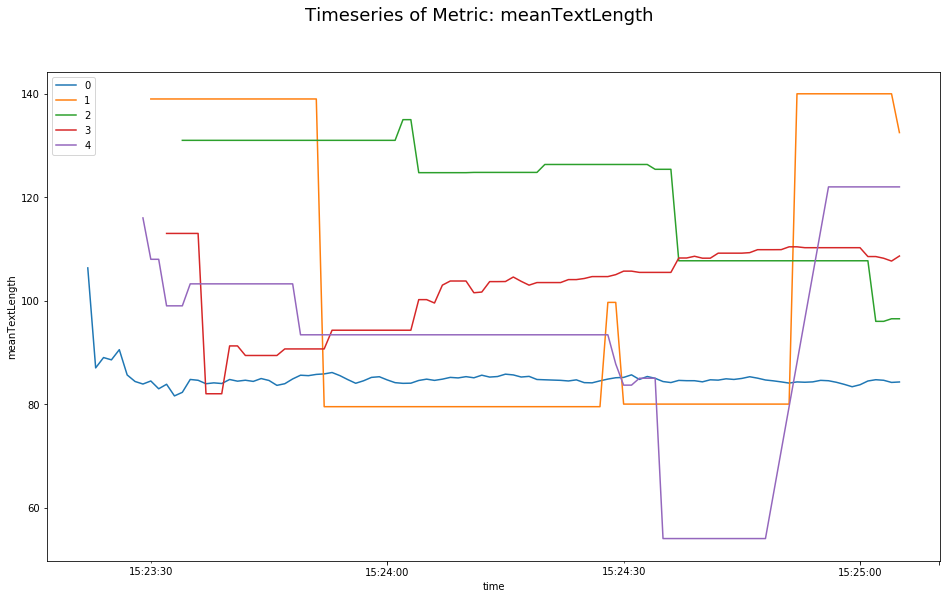

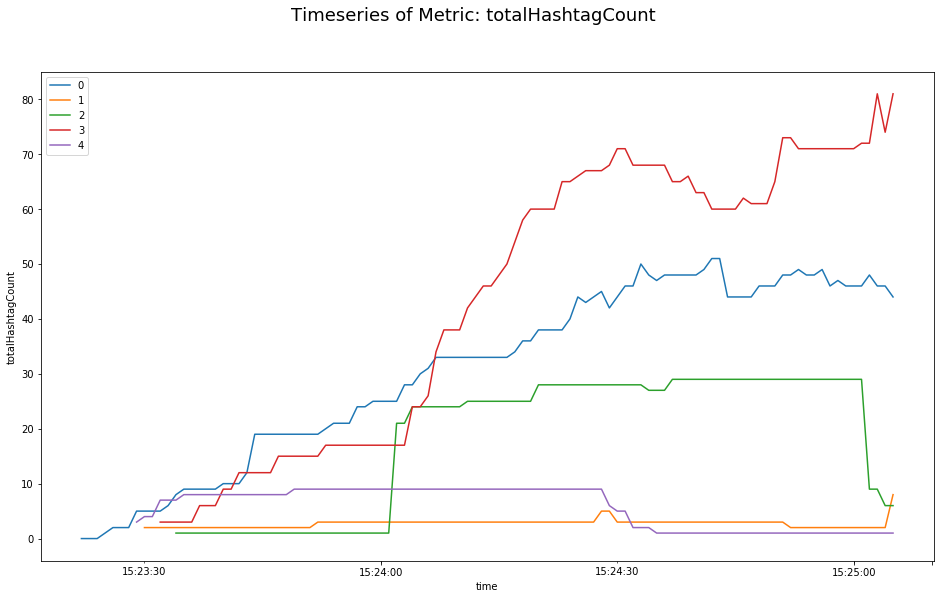

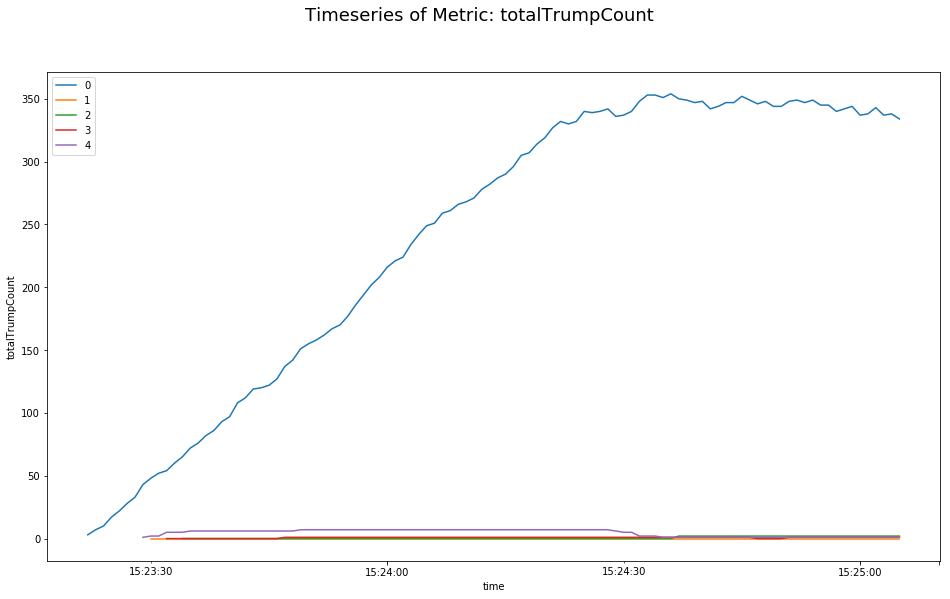

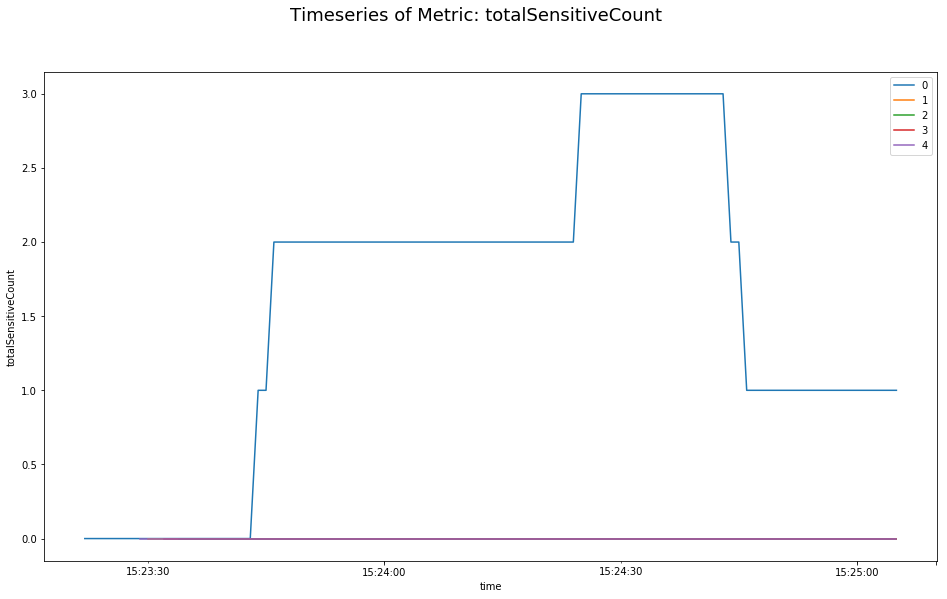

In [17]:
plotMetricTimeseries(comboTimeseriesList, 'count', 1)
plotMetricTimeseries(comboTimeseriesList, 'meanTextLength')
plotMetricTimeseries(comboTimeseriesList, 'totalHashtagCount')
plotMetricTimeseries(comboTimeseriesList, 'totalTrumpCount')
plotMetricTimeseries(comboTimeseriesList, 'totalSensitiveCount')

In [18]:
newComboHistory = comboHistory.copy()
newComboHistory['time'] = comboHistory['timestamp'].apply(lambda x: x.time())

In [19]:
newComboHistory

,timestamp,isTrumpTweet,isNewsTweet,isFakeNewsTweet,isDemocratsTweet,isPoliticsTweet,count,meanTextLength,totalHashtagCount,totalTrumpCount,totalSensitiveCount,time
0,2017-11-26 15:23:22,False,False,False,False,False,3.0,106.333333,0,3,0,15:23:22
1,2017-11-26 15:23:23,False,False,False,False,False,7.0,87.000000,0,7,0,15:23:23
2,2017-11-26 15:23:24,False,False,False,False,False,10.0,89.000000,0,10,0,15:23:24
3,2017-11-26 15:23:25,False,False,False,False,False,18.0,88.555556,1,17,0,15:23:25
4,2017-11-26 15:23:26,False,False,False,False,False,23.0,90.521739,2,22,0,15:23:26
5,2017-11-26 15:23:27,False,False,False,False,False,30.0,85.633333,2,28,0,15:23:27
6,2017-11-26 15:23:28,False,False,False,False,False,35.0,84.371429,2,33,0,15:23:28
7,2017-11-26 15:23:29,True,False,False,False,False,1.0,116.000000,3,1,0,15:23:29
8,2017-11-26 15:23:29,False,False,False,False,False,42.0,83.880952,5,43,0,15:23:29
9,2017-11-26 15:23:30,False,False,False,False,True,1.0,139.000000,2,0,0,15:23:30


In [20]:
timePredictions = newComboHistory.groupby(['time','isTrumpTweet','isNewsTweet','isFakeNewsTweet','isDemocratsTweet','isPoliticsTweet'])['count', 'meanTextLength',
       'totalHashtagCount', 'totalTrumpCount', 'totalSensitiveCount'].agg(np.mean).reset_index()

In [21]:
timePredictions.to_csv(outputFile,
                       sep=';',
                       quotechar='"',
                       quoting=2,
                       index=False)